In [41]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [42]:
model = tf.keras.models.load_model(
    "./models/single_rgb_image_regression_V02_epochs_100_1653595623")


In [43]:
FILE_PATH = "D:\\Main\\MA_PROGR\\Data\\Test\\4_Varianten\\women_half_alias"
BUCKET_SIZE = 60


In [44]:
images = []
for file in os.listdir(FILE_PATH):
    images.append( cv2.imread("{}/{}".format(FILE_PATH, file)))

In [45]:
# image = cv2.imread("D:\\Main\\MA_PROGR\\Data\\number_grid.jpg")


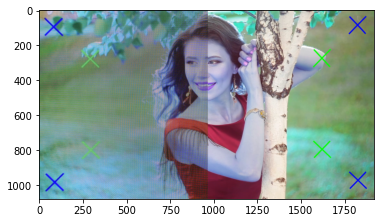

In [46]:
img = images[0]
# img = image
plt.imshow(img)

In [47]:
size_y = img.shape[0]
size_x = img.shape[1]
# size_y = image.shape[0]
# size_x = image.shape[1]

steps_horizontal = int(size_x/BUCKET_SIZE)
steps_vertikal = int(size_y/BUCKET_SIZE)

In [48]:
# steps_horizontal = 4
# steps_vertikal = 3
# start_idx = 0
# len_subset = 8
# end_idx = start_idx + len_subset

# y_start = 1
# x_start = 2


# for bucket_idx in range(start_idx, end_idx, 1):
#     x = bucket_idx % steps_horizontal
#     y = int((bucket_idx / steps_horizontal))
#     print(f"y_start: {y}, x_start: {x}")


In [49]:
# a = [[[1,2,3],[2,2,3]],[[3,3,3],[4,3,3]]]

# arr = np.asarray(a)
# arr.shape

In [50]:
# Loop through image, feed multiple buckets in model, sort results in 2D Array

img_puzz = np.full((steps_vertikal, steps_horizontal, BUCKET_SIZE, BUCKET_SIZE, 3), 0).tolist()

MAX_NUMBER_OF_BUCKETS_IN_BATCH = 20

start_idx = 0


def sort_into_alias_values(subset_of_alias_values, alias_values):

    subset_of_alias_values = np.asarray(subset_of_alias_values)
    global start_idx

    counter = 0

    len_subset = len(subset_of_alias_values)
    end_idx = start_idx + len_subset
    # subset_of_alias_values = subset_of_alias_values.reshape(len_subset, BUCKET_SIZE, BUCKET_SIZE, 3)

    for bucket_idx in range(start_idx, end_idx, 1):
        x = bucket_idx % steps_horizontal
        y = int((bucket_idx / steps_horizontal))

        

        alias_values[y][x] = subset_of_alias_values[counter]
        # img_puzz[y][x] = subset_of_alias_values[counter]
        # print(f"subset_of_alias_values[counter]: {subset_of_alias_values[counter]}")
        counter += 1

    start_idx += len_subset




def loop_through_image(img, alias_values):
    bucket_batch = []
    bucket_counter = 0
    subset_of_alias_values = 0
    sort_into_alias_values_was_called = False

    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            bucket = img[y*BUCKET_SIZE:(y+1)*BUCKET_SIZE, x *
                         BUCKET_SIZE:(x+1)*BUCKET_SIZE]

            bucket = bucket/255

            # print(f"bucket.shape: {bucket.shape}")
            bucket_batch.append(bucket.reshape(
                1, BUCKET_SIZE, BUCKET_SIZE, 3))

            bucket_counter += 1

            if bucket_counter == MAX_NUMBER_OF_BUCKETS_IN_BATCH:

                bucket_batch = np.array(bucket_batch)
                bucket_batch = bucket_batch.reshape(bucket_counter, 60, 60, 3)
                subset_of_alias_values = model.predict(bucket_batch)
                print(f"subset of alias values: {subset_of_alias_values}")
                # subset_of_alias_values = bucket_batch
                sort_into_alias_values(subset_of_alias_values, alias_values)
                sort_into_alias_values_was_called = True
                bucket_counter = 0
                bucket_batch = bucket_batch.tolist()
                del bucket_batch[:]

    if not sort_into_alias_values_was_called:
        subset_of_alias_values = model.predict(bucket_batch)
        # subset_of_alias_values = bucket_batch
        sort_into_alias_values(subset_of_alias_values)



    return alias_values
    # ??


# loop_through_image(image)

# # Kontrolle, ob das Bild in der richtigen Reihenfolge wieder zusammengesetzt wird
# for y in range(steps_vertikal):
#     for x in range(steps_vertikal):
#         plt.imshow(img_puzz[y][x])
#         plt.show()

In [51]:
def create_tile(bucket_size, alias_value):
    myArray = np.zeros((BUCKET_SIZE, BUCKET_SIZE))
    for y in range(bucket_size):
        for x in range(bucket_size):
            myArray[y][x] = alias_value

    return myArray



In [52]:
def create_grayscale_img(img):

    global start_idx
    horizontal_stripes = []
    horizontal_result = 0
    final_result = 0

    alias_values = np.full((steps_vertikal, steps_horizontal), 0).tolist()
    alias_values = loop_through_image(img, alias_values)
    start_idx = 0

    # print(f"alias_values: {np.array(alias_values).shape}")

    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            # print("x: {}".format(x))
            if x == 0:
                horizontal_result = create_tile(BUCKET_SIZE, alias_values[y][x])
                plt.imshow(horizontal_result)
                continue
            horizontal_result = np.concatenate(
                (horizontal_result, create_tile(BUCKET_SIZE, alias_values[y][x])), axis=1)
        if y == 0:
            final_result = horizontal_result
            continue
        final_result = np.concatenate((final_result, horizontal_result))
        horizontal_result = 0

    return final_result

    # plt.imshow(final_result, cmap="gray")
    # plt.show()




subset of alias values: [[0.7916791 ]
 [0.83442175]
 [0.819425  ]
 [0.77707666]
 [0.71439517]
 [0.7383885 ]
 [0.73015964]
 [0.7494613 ]
 [0.75665325]
 [0.80737793]
 [0.81445515]
 [0.8464508 ]
 [0.873241  ]
 [0.95372415]
 [0.9650246 ]
 [0.9750532 ]
 [0.02976751]
 [0.02393663]
 [0.01757663]
 [0.02190116]]
subset of alias values: [[0.01212397]
 [0.00996137]
 [0.00987971]
 [0.02007002]
 [0.03420877]
 [0.04031783]
 [0.01376182]
 [0.01691228]
 [0.01524991]
 [0.01004273]
 [0.01236883]
 [0.01566839]
 [0.89738643]
 [0.51694196]
 [0.77452964]
 [0.6203078 ]
 [0.7611797 ]
 [0.7656263 ]
 [0.7572857 ]
 [0.75977   ]]
subset of alias values: [[0.77854395]
 [0.83442444]
 [0.8522035 ]
 [0.8894474 ]
 [0.9077377 ]
 [0.8936153 ]
 [0.9696324 ]
 [0.9414345 ]
 [0.01372331]
 [0.01270783]
 [0.03388137]
 [0.02077261]
 [0.01299673]
 [0.02261543]
 [0.01297545]
 [0.03800452]
 [0.03032273]
 [0.03286499]
 [0.01180863]
 [0.01818889]]
subset of alias values: [[0.01360995]
 [0.01482454]
 [0.00749624]
 [0.02004552]
 [0.9

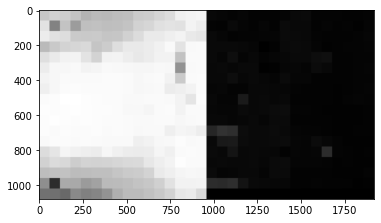

subset of alias values: [[0.7994609 ]
 [0.8285047 ]
 [0.82190245]
 [0.7653984 ]
 [0.72624904]
 [0.7387693 ]
 [0.7402617 ]
 [0.7463001 ]
 [0.7582052 ]
 [0.7879954 ]
 [0.814624  ]
 [0.83727396]
 [0.9051471 ]
 [0.9459237 ]
 [0.967983  ]
 [0.9828434 ]
 [0.02884394]
 [0.0223645 ]
 [0.01512277]
 [0.0216845 ]]
subset of alias values: [[0.00889868]
 [0.01080242]
 [0.00873381]
 [0.02231362]
 [0.03000161]
 [0.03991306]
 [0.01437864]
 [0.0140281 ]
 [0.01948011]
 [0.01033574]
 [0.0127238 ]
 [0.01501042]
 [0.8893735 ]
 [0.588101  ]
 [0.7901333 ]
 [0.56607974]
 [0.755094  ]
 [0.7612447 ]
 [0.758953  ]
 [0.7559252 ]]
subset of alias values: [[0.7732062 ]
 [0.7944693 ]
 [0.80905807]
 [0.8735397 ]
 [0.9075055 ]
 [0.880478  ]
 [0.96809566]
 [0.9298601 ]
 [0.01210019]
 [0.01191622]
 [0.0326317 ]
 [0.02116498]
 [0.01350915]
 [0.02246609]
 [0.00781977]
 [0.03789729]
 [0.02994245]
 [0.03136665]
 [0.01137403]
 [0.01906186]]
subset of alias values: [[0.01360467]
 [0.0144628 ]
 [0.00715137]
 [0.01963526]
 [0.9

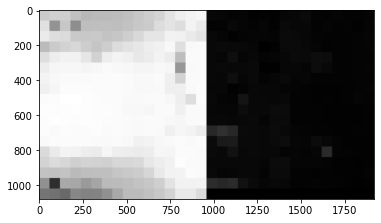

subset of alias values: [[0.81498456]
 [0.7845656 ]
 [0.82009006]
 [0.7398193 ]
 [0.7344421 ]
 [0.73867   ]
 [0.75155044]
 [0.7523059 ]
 [0.74727404]
 [0.80813026]
 [0.81477284]
 [0.8247876 ]
 [0.9353795 ]
 [0.9420773 ]
 [0.9684894 ]
 [0.98906654]
 [0.03075176]
 [0.02228746]
 [0.01881507]
 [0.02033758]]
subset of alias values: [[0.00778735]
 [0.01121649]
 [0.01097581]
 [0.0239808 ]
 [0.02577996]
 [0.0398908 ]
 [0.015035  ]
 [0.01431251]
 [0.01988459]
 [0.01040909]
 [0.01278114]
 [0.01409048]
 [0.8897728 ]
 [0.45969877]
 [0.818429  ]
 [0.6047426 ]
 [0.7614769 ]
 [0.7697235 ]
 [0.76097345]
 [0.75767314]]
subset of alias values: [[0.77880114]
 [0.8176186 ]
 [0.82692826]
 [0.8475488 ]
 [0.92137134]
 [0.89721334]
 [0.982586  ]
 [0.9323894 ]
 [0.01096299]
 [0.015461  ]
 [0.03537586]
 [0.02115723]
 [0.01184046]
 [0.02467722]
 [0.00628185]
 [0.03833738]
 [0.03020552]
 [0.02849931]
 [0.00949931]
 [0.01634955]]
subset of alias values: [[0.0147391 ]
 [0.01456496]
 [0.00667042]
 [0.01975352]
 [0.9

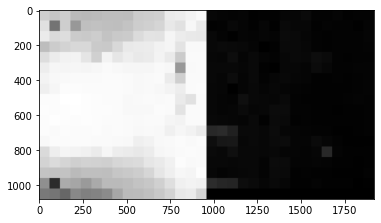

subset of alias values: [[0.8110851 ]
 [0.82714385]
 [0.8177882 ]
 [0.77282846]
 [0.731254  ]
 [0.74306905]
 [0.7382505 ]
 [0.7517483 ]
 [0.7612592 ]
 [0.8075024 ]
 [0.80177975]
 [0.8409833 ]
 [0.90089273]
 [0.9494301 ]
 [0.96704054]
 [0.98233306]
 [0.03314143]
 [0.02156609]
 [0.02109146]
 [0.0181199 ]]
subset of alias values: [[0.00758201]
 [0.01203778]
 [0.01168573]
 [0.02415219]
 [0.02201551]
 [0.03908217]
 [0.0123952 ]
 [0.01326838]
 [0.02292669]
 [0.01136005]
 [0.01326078]
 [0.01341316]
 [0.8906685 ]
 [0.52446526]
 [0.77865326]
 [0.6115436 ]
 [0.76449394]
 [0.76851064]
 [0.7603084 ]
 [0.760036  ]]
subset of alias values: [[0.7779124 ]
 [0.86219025]
 [0.8417232 ]
 [0.8987188 ]
 [0.91090965]
 [0.89456445]
 [0.9727087 ]
 [0.94126356]
 [0.00927907]
 [0.02151006]
 [0.03403559]
 [0.02276936]
 [0.01191503]
 [0.02614981]
 [0.00206071]
 [0.03866383]
 [0.03287596]
 [0.02706024]
 [0.01288953]
 [0.01674229]]
subset of alias values: [[0.01593912]
 [0.01466346]
 [0.00552416]
 [0.01957619]
 [0.9

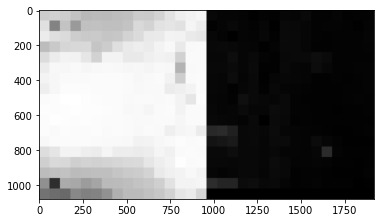

In [53]:



grayscale_images = []

for img in images:
    grayscale_image = create_grayscale_img(img)
    plt.imshow(grayscale_image, cmap="gray")
    plt.show()
    grayscale_images.append(grayscale_image)
